## An end-to-end example: A linear classifier in pure TensorFlow

[DLWP, Chapter 3](https://deeplearningwithpython.io/chapters/chapter03_introduction-to-ml-frameworks/#an-end-to-end-example-a-linear-classifier-in-pure-tensorflow)

**Generating two classes of random points in a 2D plane**

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'plasma' # nice colours
plt.rcParams['lines.markersize'] = 2  # nice scatter point size
import tensorflow as tf
import numpy as np

In [2]:
num_samples_per_class = 1000

# our data: two clouds of points,
# to be classified positive and negative
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class
)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class
)

In [3]:
# Plumbing: we stack the two classes into an array with shape (2000, 2)
# the first 1000 are the coordinates for negative points,
# the next 1000 are for positive points
inputs = np.vstack(
    (
        negative_samples,
        positive_samples
    )
).astype(np.float32)
print("inputs shape:", inputs.shape)
print("first five points:")
print(inputs[:5])
print()

inputs shape: (2000, 2)
first five points:
[[ 0.41093552  3.276874  ]
 [-2.0289469   2.7367487 ]
 [-2.232763    1.7975584 ]
 [-0.7971415   3.3331237 ]
 [-0.41165447  3.357856  ]]



In [4]:
# More plumbing: we generate the corresponding targets (0 and 1)
# the first 1000 are 0, the next are 1
targets = np.vstack(
    (
        np.zeros((num_samples_per_class, 1), dtype="float32"),
        np.ones((num_samples_per_class, 1), dtype="float32")
    )
)

In [5]:
print("targets shape:", targets.shape)
print()
print("first two positive and negative data points with labels:")
print(inputs[:2])
print(targets[:2])
print()
print(inputs[1000:1002])
print(targets[1000:1002])

targets shape: (2000, 1)

first two positive and negative data points with labels:
[[ 0.41093552  3.276874  ]
 [-2.0289469   2.7367487 ]]
[[0.]
 [0.]]

[[ 2.407393   -1.2744659 ]
 [ 3.1841657  -0.39360064]]
[[1.]
 [1.]]


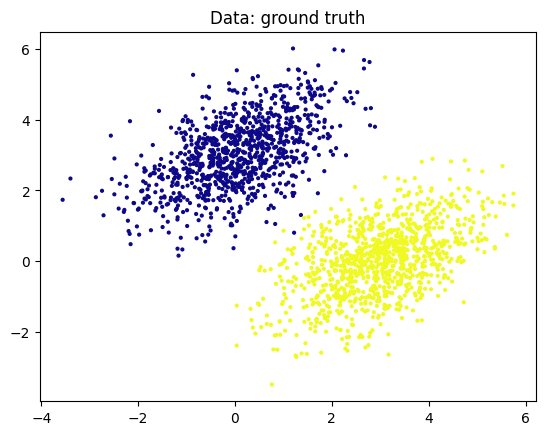

In [6]:
# Plotting the two point classes
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.title("Data: ground truth")
plt.show()

**Creating the linear classifier variables**

Our linear model is $Wx + b$ , learning a line with a slope and offset `W` is two-dimensional (x and y), `b` is one-dimensional. When we compute $Wx$, a dot product, we have two 'inputs' (x and y), 
and we end up with one 'output', that will be added to `b`.

In [7]:
input_dim = 2
output_dim = 1

# initialisation: random for W, 0 for b
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

I0000 00:00:1765199656.931654 16595431 service.cc:148] XLA service 0x6000038c4600 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1765199656.931673 16595431 service.cc:156]   StreamExecutor device (0): Host, Default Version


print(W)
print()
print(b)

**The forward pass function**

In [8]:
# our model, given (x, y) we compute a linear transformation and return a number
def model(inputs):
    return tf.matmul(inputs, W) + b # Wx + b

In [9]:
my_point = [[1.,2.]]
print(model(my_point))
my_other_point = [[-1.,2.]]
print(model(my_other_point))

tf.Tensor([[0.18429112]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.14514184]], shape=(1, 1), dtype=float32)


In [10]:
# we can do many points in one fell swoop!
my_vector_of_points = tf.concat([my_point, my_other_point], axis=0)
print(my_vector_of_points)
print(model(my_vector_of_points))

tf.Tensor(
[[ 1.  2.]
 [-1.  2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0.18429112]
 [0.14514184]], shape=(2, 1), dtype=float32)


**The mean squared error loss function**

In [11]:
# how far are we from our predictions?
# take the difference and square it (all positive)
# finally, take the average over the whole tensor
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [12]:
learning_rate = 0.1

def training_step(inputs, targets):
    # we will learn about the gradient: what this does is 
    # computing how much we need to change W and b to improve
    # performance a little bit
    with tf.GradientTape() as tape:
        predictions = model(inputs)                                  # 1. We make a prediction
        loss = square_loss(targets, predictions)                     # 2. We check how good we did
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])   # 3. Accordingly, we compute how much
    W.assign_sub(grad_loss_wrt_W * learning_rate)                    #    we need to tweak W and b in order
    b.assign_sub(grad_loss_wrt_b * learning_rate)                    #    to improve performance!
    return loss

**The batch training loop**

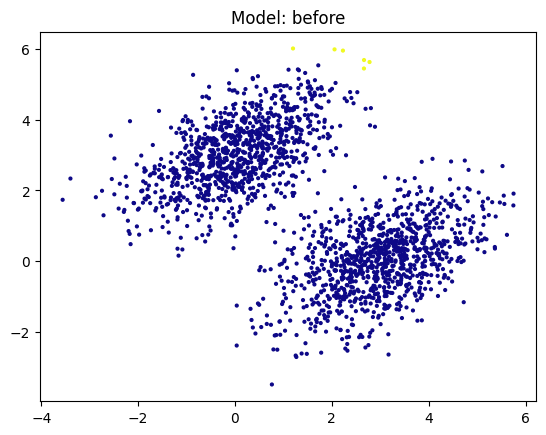

In [13]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.title("Model: before")
plt.show()

In [14]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step+1}: {loss:.4f}")

Loss at step 1: 0.4832
Loss at step 2: 0.0852
Loss at step 3: 0.0733
Loss at step 4: 0.0681
Loss at step 5: 0.0642
Loss at step 6: 0.0607
Loss at step 7: 0.0576
Loss at step 8: 0.0547
Loss at step 9: 0.0521
Loss at step 10: 0.0497
Loss at step 11: 0.0476
Loss at step 12: 0.0456
Loss at step 13: 0.0438
Loss at step 14: 0.0421
Loss at step 15: 0.0406
Loss at step 16: 0.0392
Loss at step 17: 0.0380
Loss at step 18: 0.0368
Loss at step 19: 0.0358
Loss at step 20: 0.0348
Loss at step 21: 0.0340
Loss at step 22: 0.0332
Loss at step 23: 0.0325
Loss at step 24: 0.0318
Loss at step 25: 0.0312
Loss at step 26: 0.0306
Loss at step 27: 0.0301
Loss at step 28: 0.0297
Loss at step 29: 0.0293
Loss at step 30: 0.0289
Loss at step 31: 0.0285
Loss at step 32: 0.0282
Loss at step 33: 0.0279
Loss at step 34: 0.0277
Loss at step 35: 0.0274
Loss at step 36: 0.0272
Loss at step 37: 0.0270
Loss at step 38: 0.0268
Loss at step 39: 0.0266
Loss at step 40: 0.0265


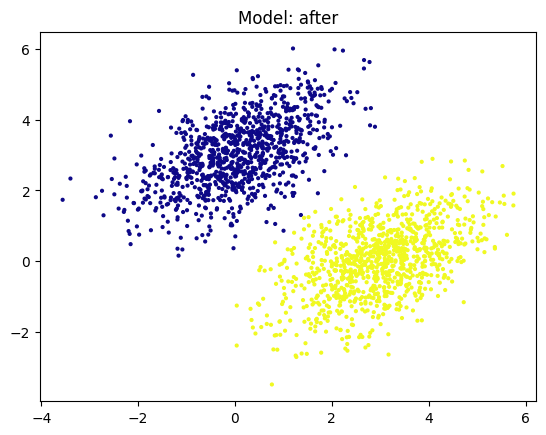

In [15]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.title("Model: after")
plt.show()

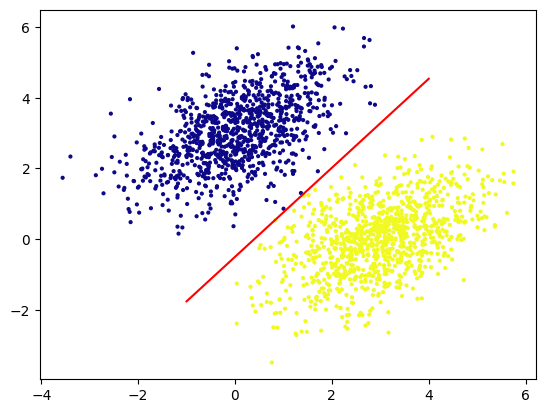

In [16]:
x = np.linspace(-1, 4, 100) # a bunch of points
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r") # this is the separation line the model learns
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

---

# Visualisation

In [23]:
learning_rate = 0.05
import time

def training_step_with_plot(inputs, targets, step, plot=False):
    # we will learn about the gradient: this is how the model knows how to change
    # in order to improve itself!
    with tf.GradientTape() as tape:
        predictions = model(inputs)                                   # 1. We make a prediction
        loss = square_loss(targets, predictions)                      # 2. We see how good they were
        # -----------------------------------
        # optional plotting
        if plot:
            x = np.linspace(-1, 4, 100)          
            y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
            plt.plot(x, y, "-r")
            plt.xlim([-4, 7]) # just to make sure our plots
            plt.ylim([-4, 7]) # remain the same size
            plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
            plt.title(f"Loss at step {step}: {loss}")
            plt.text(-3.9, 6.5, f"W: {W.numpy().ravel()}")
            plt.text(-3.9, 6, f"b:  {b.numpy()}")
            plt.show()
        # -----------------------------------            
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])    # 3. Accordingly, we compute by
    W.assign_sub(grad_loss_wrt_W * learning_rate)                     #    how much we need to tweak
    b.assign_sub(grad_loss_wrt_b * learning_rate)                     #    our parameters W & b, and do it
    return loss

In [24]:
# reinitialise our variables
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

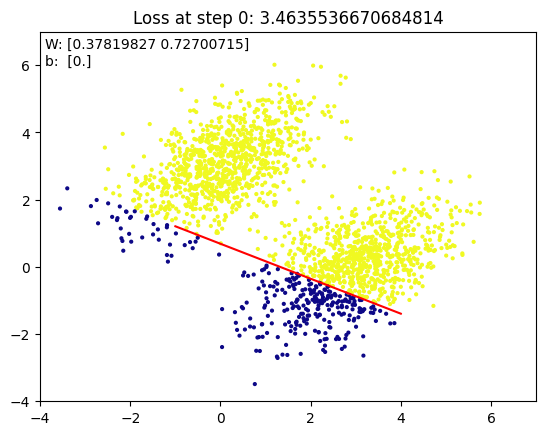

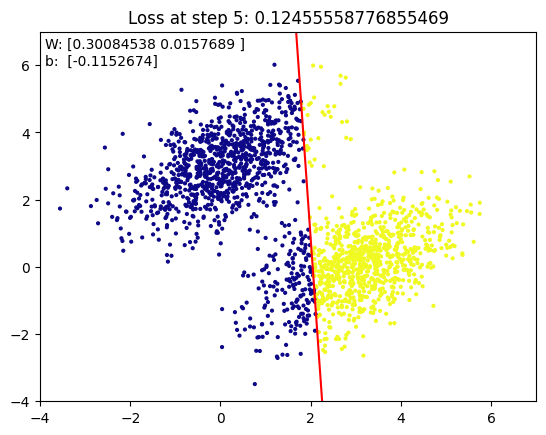

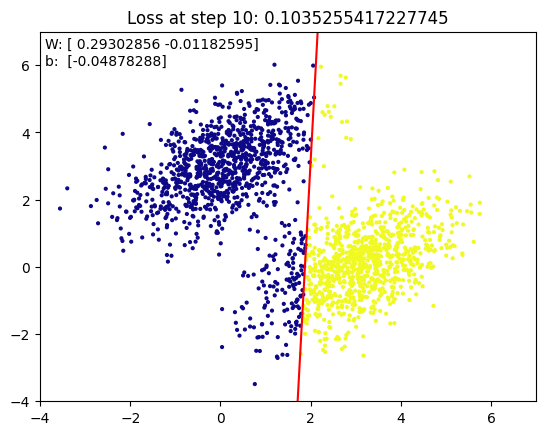

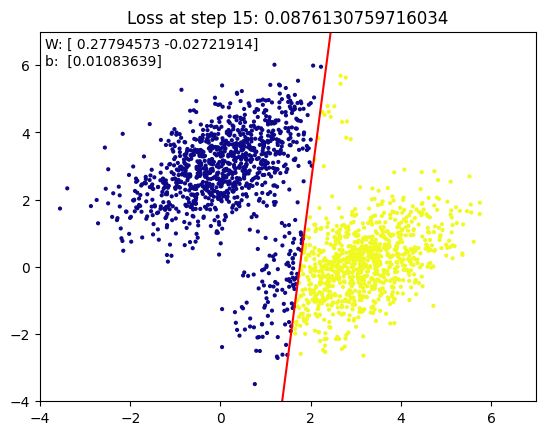

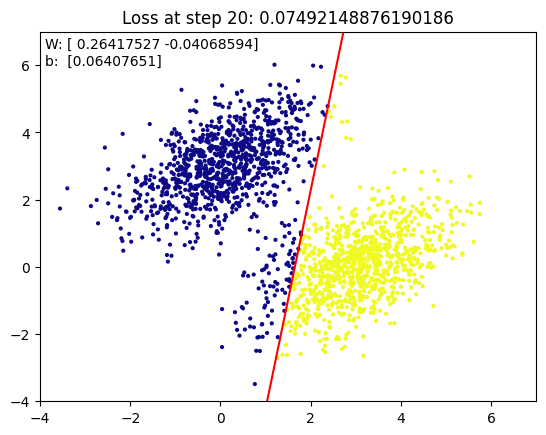

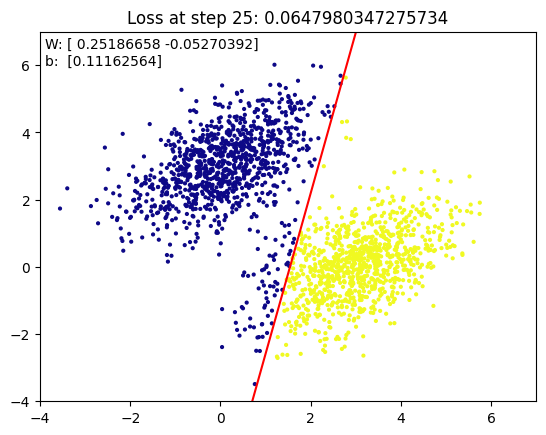

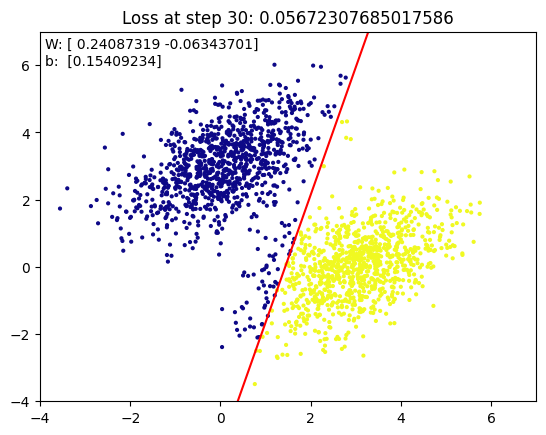

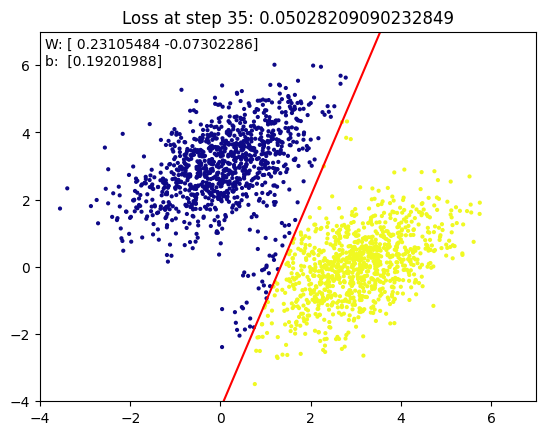

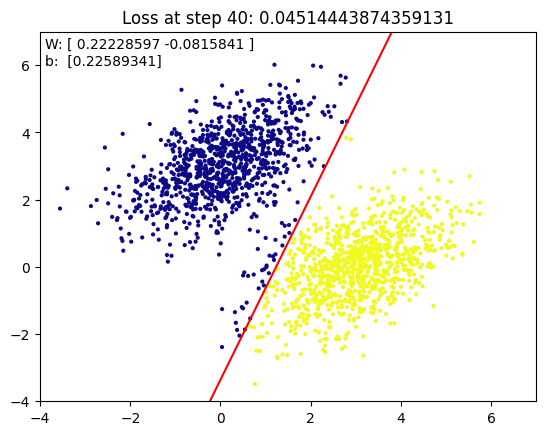

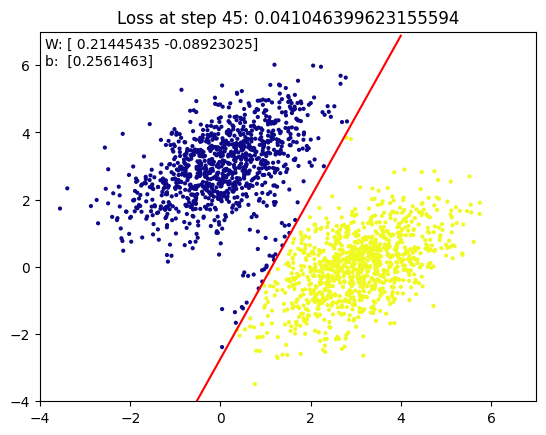

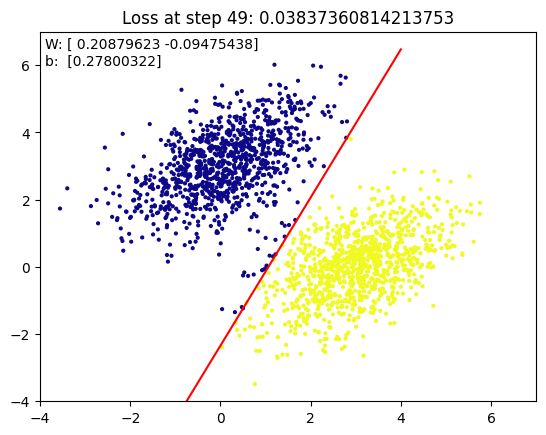

ground truth:


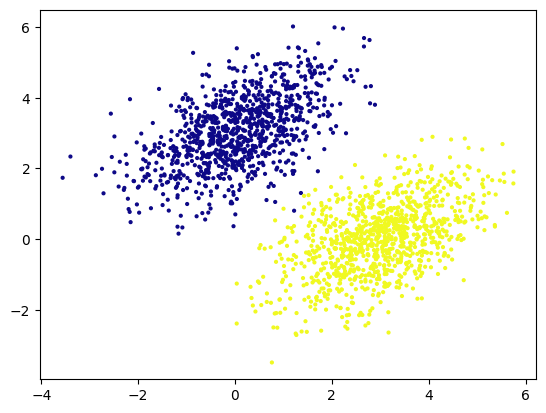

In [25]:
epochs = 50
for step in range(epochs):
    # every five step we will plot our progress
    plot = False
    if step % 5 == 0 or step == epochs - 1:
        plot = True
    loss = training_step_with_plot(inputs, targets, step, plot=plot)
    time.sleep(.5)
  
# compare with our actual data
print("=" * 80)
print("ground truth:")
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()